# Linux Network stack monitoring

This notebook graphs the output results of the Linux network stack monitored using bpftrace hooks.

## Device specs
OS: Ubuntu 20.04.1-64
Remote Mgmt Card: Lenovo IMM2 - Onboard
RAM: 4x 8GB Hynix 8GB DDR4 2666 1Rx8 NON REG
Processor: 3.8GHz Intel Xeon-KabyLake (E3-1270-V6-Quadcore)
Power Supply: 2x Lenovo 94Y8348
Network Card: Silicom PE310G4i40-T
Motherboard: Lenovo Systemx3250-M6
Drive Controller: Mainboard Onboard
Backplane: Lenovo 00MU417
NIC Controller: Ethernet Controller 10-Gugabit X540-AT2
NIC driver: ixgbe, version=5.1.0-k, speed=1Gbit/s, clock=33MHz, width=64bits, size=1Gbit/s


In [30]:
stats = [
    { 
        'bandwith': 957, 'transfer': 13400, 
        'q': 
        [
            [283210, 4773], 
            [422543032, 5025332, 7794, 6597, 1396],
            [2354514443, 27772586, 32593, 27815, 5640],
            [5079417933, 60062609, 64484, 56769, 8999]
        ] , 
        'c': [
            [148, 2], 
            [919278,10800, 10, 8, 1],
            [1838416, 21598, 20, 16, 2],
            [9652322, 113394, 115, 87, 12]
        ],
        'openssl': [16.87, 17.16, 16.77, 16.7, 16.77, 16.73],
        'tcs': [23776293, 42899878, 5238550, 698562690, 451963102, 1358979205, 2606532, 44860125], 
        'ncs': [2925, 17895, 5069, 497958, 326641, 1022971, 634, 11026 ] 
    },
    { 
        'bandwith': 800, 'transfer': 11200, 
        'q': [
            [49781, 308821464, 2263, 7718952 ], 
            [413468908, 4722063, 17192 ],
            [22371297, 1989738048, 21096 ],
            [51614119, 4234160334, 51624 ]
        ] , 
        'c': [
            [36, 219022, 1, 3294], 
            [862607,9783, 7],
            [17558, 1556175, 13 ],
            [97891, 8009776, 69 ]
        ],
        'comm': [
            ['iperf', 'openssl', 'ksoftirqd/2', 'swapper/2'],
            ['openssl', 'swapper/2', 'ksoftirqd/2' ],
            ['swapper/2', 'openssl', 'ksoftirqd/2' ],
            ['swapper/2', 'openssl', 'ksoftirqd/2' ],
        ],
        'openssl': [ 17.72, 17.20, 17.57, 17.16, 17.34, 17.43 ],
        'tcs': [29046065, 8996578, 4149481, 798250451, 787888541, 343199960, 2057476, 9912122 ], 
        'ncs': [9268, 1095, 4173, 631692, 655152, 258887, 440, 916 ] 
    },
    { 
        'bandwith': 600, 'transfer': 8380, 
        'q': [
            [994753419, 22741791, 5811, 56730, 4858 ], 
            [413965543, 8800121, 2593, 2250, 1257],
            [1355065015, 29760313, 15167, 10126, 6213],
            [72255108, 34528, 22051, 3809345951, 21948, 36098]
        ] , 
        'c': [
            [746410, 16995, 3,26,2 ], 
            [747510, 15886, 3,2,1],
            [910053, 19763, 8,5,3],
            [135824, 61,38,5983352,12,17]
        ],
        'comm': [
            ['openssl', 'swapper/2', 'kworker/2:10', 'bpftrace', 'ksoftirqd/2'],
            ['openssl', 'swapper/2', 'kworker/2:10', 'ksoftirqd/2', 'migration/2'],
            ['openssl', 'swapper/2', 'kworker/2:10', 'ksoftirqd/2', 'migration/2'],
            ['swapper/2', 'kworker/2:10', 'ksoftirqd/2', 'openssl',  'bpftrace', 'migration/2']
        ],
        'openssl': [ 18.20, 17.93, 18.02, 18.08, 17.89, 17.95 ],
        'tcs': [54010536, 3927138, 3820749, 388395003, 17009451, 2455764789, 2667987, 4832476 ], 
        'ncs': [12505, 1441, 3390, 71920, 2368, 859335, 990, 602 ] 
    },
    { 
        'bandwith': 400, 'transfer': 5590, 
        'q': [
            [1028586194, 13702813, 13449, 20711, 82218, 2112, 7364], 
            [470220105, 5402717, 4401, 3593, 3546],
            [1092943043, 12504174, 9713, 7343, 6319 ],
            [26558073, 63780, 24788, 2470627725, 1090, 12075 ]
        ] , 
        'c': [
            [913241, 12025, 8,12,47,1,3], 
            [913237, 10396, 6,4,3],
            [913237, 10396, 6, 4, 3],
            [49370, 110, 42, 4007754, 16, 19]
        ],
        'comm': [
            ['openssl', 'swapper/2', 'kworker/2:12', 'ksoftirqd/2', 'bpftrace', 'rcu_sched', 'migration/2'],
            ['openssl', 'swapper/2', 'kworker/2:12', 'ksoftirqd/2', 'migration/2'],
            ['openssl', 'swapper/2', 'kworker/2:12', 'ksoftirqd/2', 'migration/2'],
            ['swapper/2', 'bpftrace', 'kworker/2:12', 'openssl',  'migration/2', 'ksoftirqd/2'],
        ],
        'openssl': [ 18.63, 18.37, 18.37, 18.53, 18.27, 18.22 ],
        'tcs': [35829138, 10978030, 2759406, 1381783938, 1410122394, 232479984, 1236220, 7292546 ], 
        'ncs': [12487, 1919,2652, 234613, 560312, 132930, 336, 861 ] 
    },
    { 
        'bandwith': 200, 'transfer': 2790, 
        'q': [
            [12602662, 764296978, 56247, 6156, 7911, 3586], 
            [6374746, 435246860, 2251, 4535, 2186],
            [798680908, 11816609, 3859, 7948, 3239 ],
            [1104124917, 17566412, 3015, 9909, 6273, 3251 ]
        ] , 
        'c': [
            [14998, 908281, 51, 5,6,2], 
            [13328,908263, 3,6,2],
            [908263, 13328, 3,6,2],
            [1992818, 31290, 4,13, 8, 4]
        ],
        'comm': [
            ['swapper/2', 'openssl', 'bpftrace', 'kworker/2:0', 'ksoftirqd/2', 'migration/2'],
            ['swapper/2', 'openssl', 'kworker/2:0', 'ksoftirqd/2', 'migration/2'],
            ['openssl', 'swapper/2', 'kworker/2:0', 'ksoftirqd/2', 'migration/2'],
            ['openssl', 'swapper/2', 'migration/2', 'ksoftirqd/2', 'kworker/2:0', 'bpftrace'],
        ],
        'openssl': [19.10, 18.99, 18.90, 18.93, 18.92, 18.83 ],
        'tcs': [11873241, 19150269, 2127825, 717236023,  851120242, 458518616, 32596738, 151282047 ], 
        'ncs': [2400, 1448, 1817, 299554, 462956, 93061, 12347, 70729] 
    },
    { 
        'bandwith': 100, 'transfer': 1490, 
        'q': [
            [642967930, 10512061, 17481, 20196, 62910, 6017], 
            [5830871, 429167880, 9865, 13191, 3967],
            [658150398, 9512359, 16037, 22525, 31455],
            [8822965, 597849468, 14041, 18206, 4480, 1160]
        ] , 
        'c': [
            [914286, 14343, 18, 19, 52, 4 ], 
            [12555, 914245, 16, 19, 4],
            [914245, 12555, 16, 19, 4],
            [14843, 1003143, 19, 23, 4, 1]
        ],
        'comm': [
            ['openssl', 'swapper/2', 'kworker/2:12', 'ksoftirqd/2', 'bpftrace', 'migration/2'],
            ['swapper/2', 'openssl',  'kworker/2:12', 'ksoftirqd/2','migration/2'],
            ['openssl',  'swapper/2', 'kworker/2:12', 'ksoftirqd/2','migration/2'],
            ['swapper/2', 'openssl',  'kworker/2:12', 'ksoftirqd/2','migration/2', 'bpftrace'],

        ],
        'openssl': [19.53, 19.66, 19.88, 19.89, 19.97, 19.99 ],
        'tcs': [9463514, 11861442, 823364, 12323236, 514488153, 25979719, 31560091, 719240532 ], 
        'ncs': [2320, 1014, 511, 1550, 362619, 1780, 12152, 566201] 
    },
    { 
        'bandwith': 50, 'transfer': 715, 
        'q': [
            [346528378, 4762585, 5468, 18882], 
            [224977997, 2566686, 3416, 1454],
            [355904022, 4315743, 5703, 2136],
            [294823372, 3727720, 4489, 1168]
        ] , 
        'c': [
            [502454, 6481, 5, 1], 
            [502389, 5495, 5, 1],
            [502389, 5495, 5, 1],
            [502389, 5987, 5, 1]
        ],
        'comm': [
            ['openssl', 'swapper/2', 'kworker/2:0', 'ksoftirqd/2'],
            ['openssl', 'swapper/2', 'kworker/2:0', 'ksoftirqd/2'],
            ['openssl', 'swapper/2', 'kworker/2:0', 'ksoftirqd/2'],
            ['openssl', 'swapper/2', 'kworker/2:0', 'ksoftirqd/2']
        ],
        'openssl': [19.66, 19.63, 19.64, 19.66, 19.61, 18.89 ],
        'tcs': [9300578, 3755930, 1169778, 130650555, 89256686, 333706440, 25118136, 178531627 ], 
        'ncs': [1140, 661, 966, 89399, 51950, 250051, 9995, 125494] 
    },
    { 
        'bandwith': 10, 'transfer': 143, 
        'q': [
            [76491119, 1470, 27404, 28605, 19072175 ], 
            [45987236, 824, 6757246],
            [76813875, 1472, 18480935],
            [61430001, 1008, 9659, 9185379]
        ] , 
        'c': [
            [100630, 1, 7, 4, 1337], 
            [100567, 1, 1124],
            [100567, 1, 1124],
            [100567, 1, 2, 1222]
        ],
        'comm': [
            ['openssl', 'kworker/2:12', 'bpftrace', 'ksoftirqd/2', 'swapper/2'],
            ['openssl', 'kworker/2:12', 'swapper/2'],
            ['openssl', 'kworker/2:12', 'swapper/2'],
            ['openssl', 'kworker/2:0', 'ksoftirqd/2', 'swapper/2']
        ],
        'openssl': [19.98, 19.96, 19.97, 19.94, 19.93, 19.89 ],
        'tcs': [13043846, 57855888, 521520, 300327516, 1955606198, 42955890, 32936674, 761305131 ], 
        'ncs': [2002, 2376, 287, 9400, 65328, 2477, 12191, 28692] 
    },
    { 
        'bandwith': 0, 'transfer': 0, 
        'q': [
            [46064, 9377], 
            [0],
            [0],
            [0]
        ] , 
        'c': [
            [60, 1], 
            [0],
            [0],
            [0]
        ],
        'comm': [
            ['openssl', 'swapper/2',],
            [''],
            [''],
            ['']
        ],
        'openssl': [20, 20, 20, 20, 20, 20 ],
        'tcs': [16691202, 7378246, 938017, 17985365, 21355856, 18324939, 347575, 24264648 ], 
        'ncs': [1374, 504, 221, 1169, 1600, 1248, 94, 2545] 
    },
    # { 
    #     'bandwith': 0, 'transfer': 0, 
    #     'q': [
    #         [511439], 
    #         [0],
    #         [0],
    #         [0]
    #     ] , 
    #     'c': [
    #         [61], 
    #         [0],
    #         [0],
    #         [0]
    #     ],
    #     'comm': [
    #         ['swapper/2',],
    #         [''],
    #         [''],
    #         ['']
    #     ],
    #     'openssl': [20, 20, 20, 20, 20, 20 ],
    #     'tcs': [64154400, 60456173, 64913117, 46438523, 29056945, 67202350, 42971821, 42735120 ], 
    #     'ncs': [1417, 1800, 1748, 1170, 739, 1782, 1082, 1096]
    # },
]


In [31]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data=stats)


In [32]:
for o in stats:
    o['qt'] = [sum(x) for x in o['q']]
    o['ct'] = [sum(a) for a in o['c']]
    o['topenssl'] = sum(o['openssl'])
print(stats)

[{'bandwith': 957, 'transfer': 13400, 'q': [[283210, 4773], [422543032, 5025332, 7794, 6597, 1396], [2354514443, 27772586, 32593, 27815, 5640], [5079417933, 60062609, 64484, 56769, 8999]], 'c': [[148, 2], [919278, 10800, 10, 8, 1], [1838416, 21598, 20, 16, 2], [9652322, 113394, 115, 87, 12]], 'openssl': [16.87, 17.16, 16.77, 16.7, 16.77, 16.73], 'tcs': [23776293, 42899878, 5238550, 698562690, 451963102, 1358979205, 2606532, 44860125], 'ncs': [2925, 17895, 5069, 497958, 326641, 1022971, 634, 11026], 'qt': [287983, 427584151, 2382353077, 5139610794], 'ct': [150, 930097, 1860052, 9765930], 'topenssl': 101.0}, {'bandwith': 800, 'transfer': 11200, 'q': [[49781, 308821464, 2263, 7718952], [413468908, 4722063, 17192], [22371297, 1989738048, 21096], [51614119, 4234160334, 51624]], 'c': [[36, 219022, 1, 3294], [862607, 9783, 7], [17558, 1556175, 13], [97891, 8009776, 69]], 'comm': [['iperf', 'openssl', 'ksoftirqd/2', 'swapper/2'], ['openssl', 'swapper/2', 'ksoftirqd/2'], ['swapper/2', 'openssl'

[287.983, 316592.46, 1017562.609, 1042414.861, 776973.54, 653586.595, 351315.313, 95620.773, 55.441]


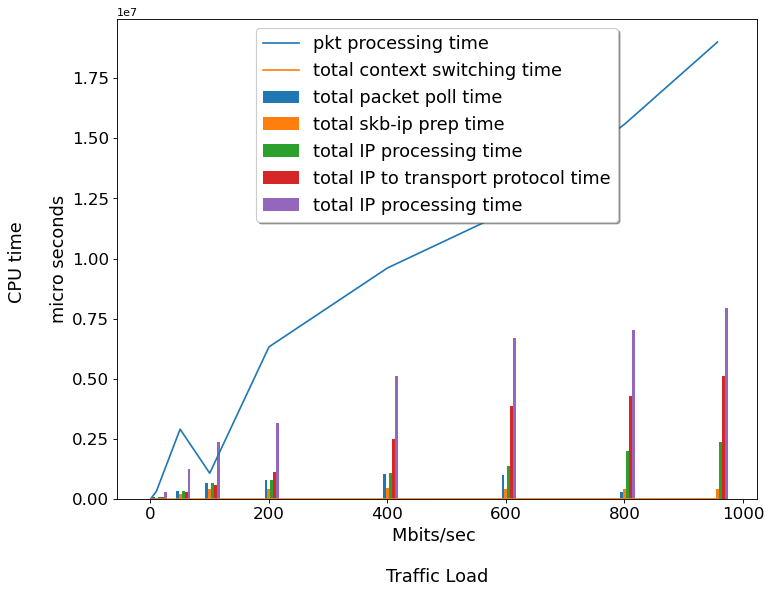


This graph summarises the results collect for each bandwidth of traffic sent to the DUT. The pkt processing time shows the amount of CPU time taken from the openssl program after the DUT started receiveing packets. We can see that when the bandwidth received was 0 there was no processing time taken from the openssl, i.e., it was using 100 percent of the CPU time.

q1 (pkt poll time) is the amount of time spent get the packets from the rx_ring to an skb_buff. This is measured from the time net_rx_action is called to poll packets, to when napi_complete_done is called, which is called when the budget has finished or there are no more packets.

q2 (skb-ip prep time) this is the time taken to prepare the skb created earlier for processing to the ip protocol. This from when napi_complete_done is called to when netif_receive_skb is envoked.

q4 (ip processing time) this is the time taken to apply ip protocol based functions to the skb/pkt and the decision of the where the packets are to be d

In [43]:
caption = '''
This graph summarises the results collect for each bandwidth of traffic sent to the DUT. The pkt processing time shows the amount of CPU time taken from the openssl program after the DUT started receiveing packets. We can see that when the bandwidth received was 0 there was no processing time taken from the openssl, i.e., it was using 100 percent of the CPU time.

q1 (pkt poll time) is the amount of time spent get the packets from the rx_ring to an skb_buff. This is measured from the time net_rx_action is called to poll packets, to when napi_complete_done is called, which is called when the budget has finished or there are no more packets.

q2 (skb-ip prep time) this is the time taken to prepare the skb created earlier for processing to the ip protocol. This from when napi_complete_done is called to when netif_receive_skb is envoked.

q4 (ip processing time) this is the time taken to apply ip protocol based functions to the skb/pkt and the decision of the where the packets are to be delivered locally or not. Note: just before the process starts the following hooks can be applied in their order: generic XDP, tc, netfilter ingress.  This is recorded from when netif_receive_skb is called to when ip_local_deliver is called.

q5 (ip to transport) this the tome taken from the packet is been set to be delivered locally until the transport protocol to use has been established. From when ip_local_deliver has been called, to when udp_rcv has been envoked.

total_rx_time (total ip processing) is the sum of the times above.

cs_time (cs time) this is the total amount of time taken processing context switching across all the CPUs

'''
fig = plt.figure(figsize=(8,6), dpi=80)

ax = fig.add_axes([0,0,1,1])
bandwidth = [o['bandwith'] for o in stats]
q1_rx_time = [( o['qt'][0] / 1000) for o in stats]
q2_rx_time = [( o['qt'][1] / 1000) for o in stats]
q4_rx_time = [( o['qt'][2] / 1000) for o in stats]
q5_rx_time = [( o['qt'][3] / 1000) for o in stats]
cs_time = [( sum(o['ct']) / 1000) for o in stats]
print(q1_rx_time)
total_rx_time = [( sum(o['qt']) / 1000) for o in stats]
ax.plot([o['bandwith'] for o in stats], [(120 - o['topenssl'])*1000000 for o in stats], label='pkt processing time')
ax.bar([(o - 5) for o in bandwidth], q1_rx_time, width=5, label='total packet poll time')
ax.bar([(o + 0) for o in bandwidth], q2_rx_time, width=5, label='total skb-ip prep time')
ax.bar([(o + 5) for o in bandwidth], q4_rx_time, width=5, label='total IP processing time')
ax.bar([(o + 10) for o in bandwidth], q5_rx_time, width=5, label='total IP to transport protocol time')
ax.bar([(o + 15) for o in bandwidth], total_rx_time, width=5, label='total IP processing time')
ax.plot(bandwidth, cs_time, label='total context switching time')
ax.set_xlabel('Mbits/sec \n\nTraffic Load', fontsize=16)
ax.set_ylabel('CPU time \n\nmicro seconds (1e7)', fontsize=16)


legend = ax.legend(loc='upper center', shadow=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
fig.savefig('figures/linux_performance_profiling.png')
print(caption)

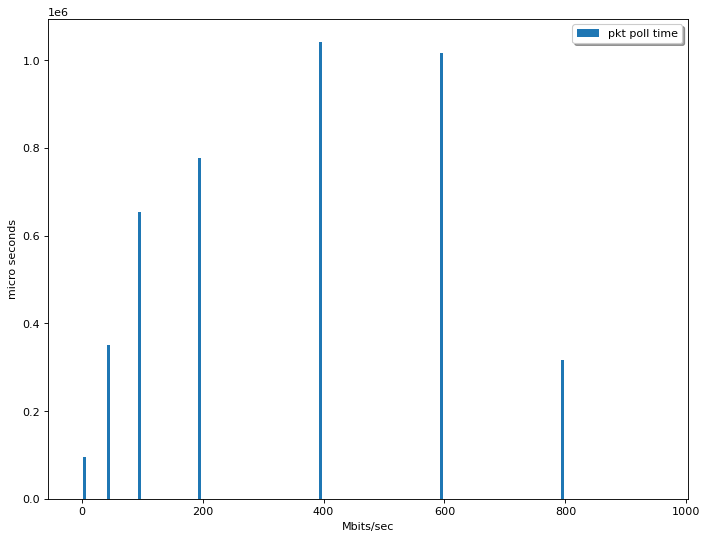


This graph shows q1 (pkt poll time) for different bandwidth of packets sent to the DUT. q1 (pkt poll time) is the amount of time spent get the packets from the rx_ring to an skb_buff. This is measured from the time net_rx_action is called to poll packets, to when napi_complete_done is called, which is called when the budget has finished or there are no more packets.



In [34]:
caption = '''
This graph shows q1 (pkt poll time) for different bandwidth of packets sent to the DUT. q1 (pkt poll time) is the amount of time spent get the packets from the rx_ring to an skb_buff. This is measured from the time net_rx_action is called to poll packets, to when napi_complete_done is called, which is called when the budget has finished or there are no more packets.
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax1 = fig.add_axes([0,0,1,1])

ax1.bar([(o - 5) for o in bandwidth], q1_rx_time, width=5, label='pkt poll time')

ax1.set_xlabel('Mbits/sec')
ax1.set_ylabel('micro seconds')

legend = ax1.legend(loc='upper right', shadow=True)

plt.show()
fig.savefig('figures/pkt_poll_time.png')
print(caption)

This shows the amount of time spent on napi complete


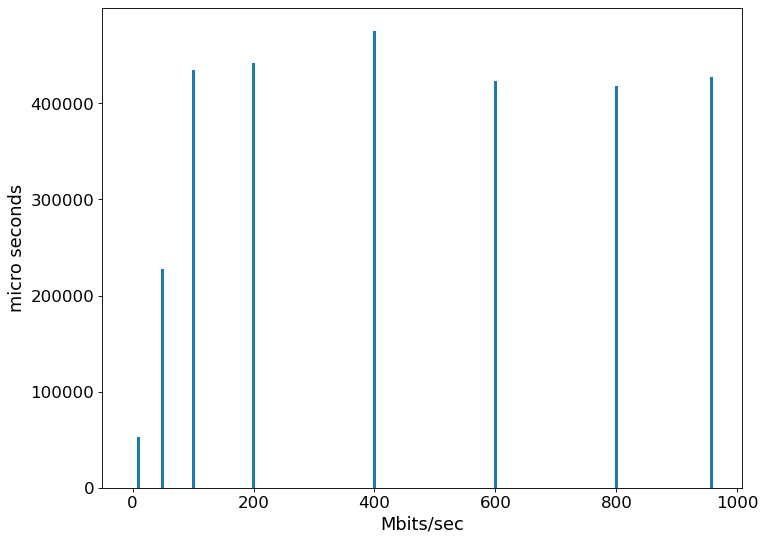

In [35]:
caption = '''
This graph shows q2 (skb-ip prep time) for different bandwidth of packets sent to the DUT. q2 (skb-ip prep time) this is the time taken to prepare the skb created earlier for processing to the ip protocol. This from when napi_complete_done is called to when netif_receive_skb is envoked.
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax2 = fig.add_axes([0,0,1,1])

ax2.bar([(o + 0) for o in bandwidth], q2_rx_time, width=5, label='skb-ip prep time')

ax2.set_xlabel('Mbits/sec', fontsize=16)
ax2.set_ylabel('micro seconds', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

print("This shows the amount of time spent on napi complete")
plt.show()
fig.savefig('figures/skb-ip_prep_time.png')

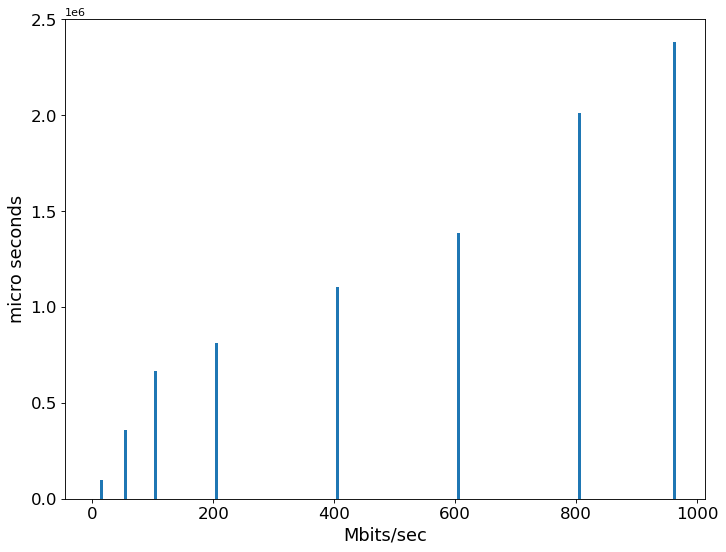


This graph shows q4 (ip processing time) for different bandwidth of packets sent to the DUT. q4 (ip processing time) this is the time taken to apply ip protocol based functions to the skb/pkt and the decision of the where the packets are to be delivered locally or not. Note: just before the process starts the following hooks can be applied in their order: generic XDP, tc, netfilter ingress.  This is recorded from when netif_receive_skb is called to when ip_local_deliver is called.



In [36]:
caption = '''
This graph shows q4 (ip processing time) for different bandwidth of packets sent to the DUT. q4 (ip processing time) this is the time taken to apply ip protocol based functions to the skb/pkt and the decision of the where the packets are to be delivered locally or not. Note: just before the process starts the following hooks can be applied in their order: generic XDP, tc, netfilter ingress.  This is recorded from when netif_receive_skb is called to when ip_local_deliver is called.
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax3 = fig.add_axes([0,0,1,1])

ax3.bar([(o + 5) for o in bandwidth], q4_rx_time, width=5, label='ip processing time')

ax3.set_xlabel('Mbits/sec', fontsize=16)
ax3.set_ylabel('micro seconds', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()
fig.savefig('figures/ip_processing_time.png')
print(caption)

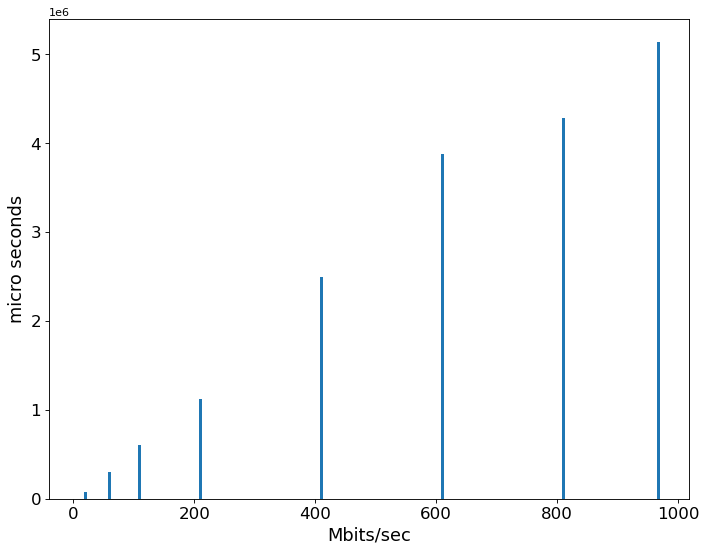


This graph shows q5 (ip to transport time) for different bandwidth of packets sent to the DUT. q5 (ip to transport time) this the tome taken from the packet is been set to be delivered locally until the transport protocol to use has been established. From when ip_local_deliver has been called, to when udp_rcv has been envoked.



In [37]:
caption = '''
This graph shows q5 (ip to transport time) for different bandwidth of packets sent to the DUT. q5 (ip to transport time) this the tome taken from the packet is been set to be delivered locally until the transport protocol to use has been established. From when ip_local_deliver has been called, to when udp_rcv has been envoked.
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax4 = fig.add_axes([0,0,1,1])

ax4.bar([(o + 10) for o in bandwidth], q5_rx_time, width=5, label='ip to transport time')

ax4.set_xlabel('Mbits/sec', fontsize=16)
ax4.set_ylabel('micro seconds', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()
fig.savefig('figures/ip_to_transport_time.png')
print(caption)

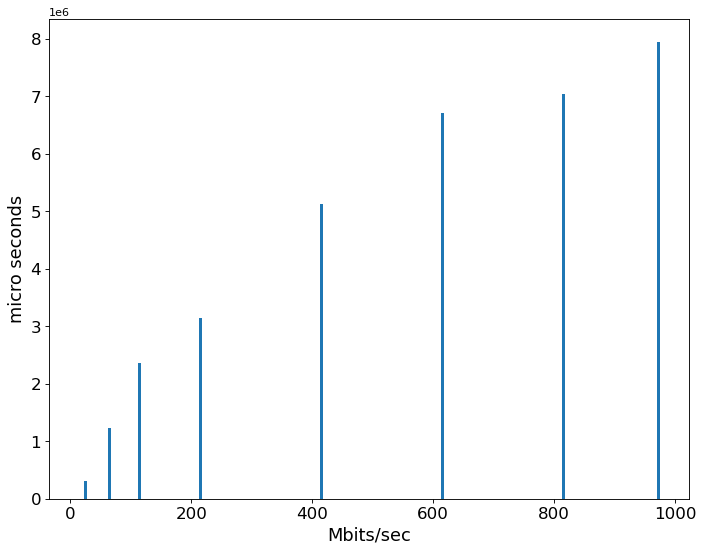


This graph shows total time spent on ip packet processing



In [38]:
caption = '''
This graph shows total time spent on ip packet processing
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax5 = fig.add_axes([0,0,1,1])

ax5.bar([(o + 15) for o in bandwidth], total_rx_time, width=5, label='total ip processing')

ax5.set_xlabel('Mbits/sec', fontsize=16)
ax5.set_ylabel('micro seconds', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
fig.savefig('figures/total_ip_processing.png')
print(caption)

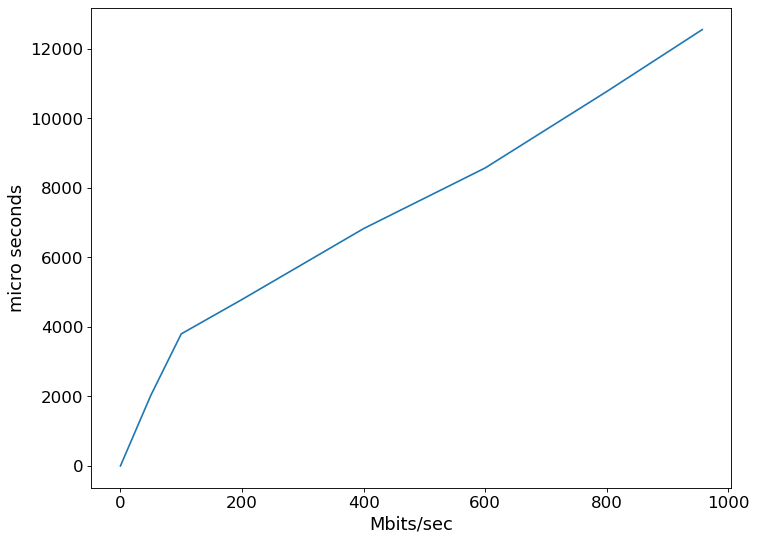


This graph shows the total time spent on context switching as the bandwidth increases



In [39]:
caption = '''
This graph shows the total time spent on context switching as the bandwidth increases
'''
fig = plt.figure(figsize=(8,6), dpi=80)
ax6 = fig.add_axes([0,0,1,1])

ax6.plot(bandwidth, cs_time, label='context switching')
ax6.set_xlabel('Mbits/sec', fontsize=16)
ax6.set_ylabel('micro seconds', fontsize=16)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/context_switching.png', dpi=300, bbox_inches='tight')

plt.show()

print(caption)